In [1]:
import pandas as pd
from math import *
import numpy as np
import matplotlib.pyplot as plt
from src import train_neural_net, draw_neural_net
from scipy import stats
from sklearn.model_selection import ShuffleSplit
import torch

### Loading Data

In [2]:
train_data=pd.read_csv('data/TrainData3.csv')
test_data=pd.read_csv('data/TestData3.csv')

In [3]:
train_data.describe()

,POWER,U10,V10,U100,V100
count,26590.000000,27048.000000,27048.000000,27048.000000,27048.000000
mean,0.519677,2.286938,0.700514,3.124931,1.051055
std,0.313106,5.100936,4.481148,7.018101,6.150222
min,0.000000,-11.649200,-18.724500,-15.922300,-25.071400
25%,0.232298,-1.747315,-2.539780,-2.175257,-3.433463
50%,0.541332,2.788535,0.745344,3.923615,1.024665
75%,0.812216,6.047033,3.814062,8.239865,5.320432
max,1.000000,21.876300,18.122800,31.050900,25.117400


In [4]:
test_data.describe()

,U10,V10,U100,V100,POWER
count,672.000000,672.000000,672.000000,672.000000,672.000000
mean,-0.832462,1.582651,-0.842722,2.225325,0.442802
std,5.198260,5.239299,6.926143,6.920581,0.331655
min,-10.889100,-10.121500,-14.019700,-13.239300,0.000000
25%,-4.274402,-2.383808,-5.500485,-3.161033,0.121603
50%,-2.502135,1.338085,-3.149345,1.834255,0.404865
75%,2.168413,5.908492,3.214927,7.888323,0.735949
max,17.059900,14.892100,23.194500,20.116700,0.998474


### Columns distribution

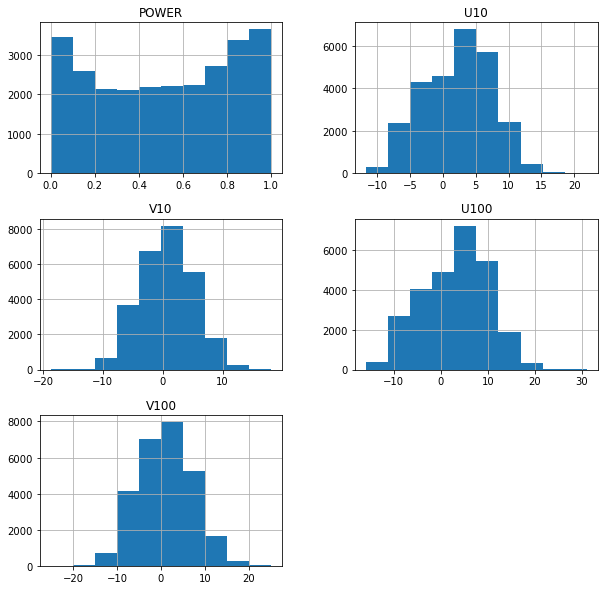

In [5]:
train_data.hist(figsize=(10,10))
plt.show()

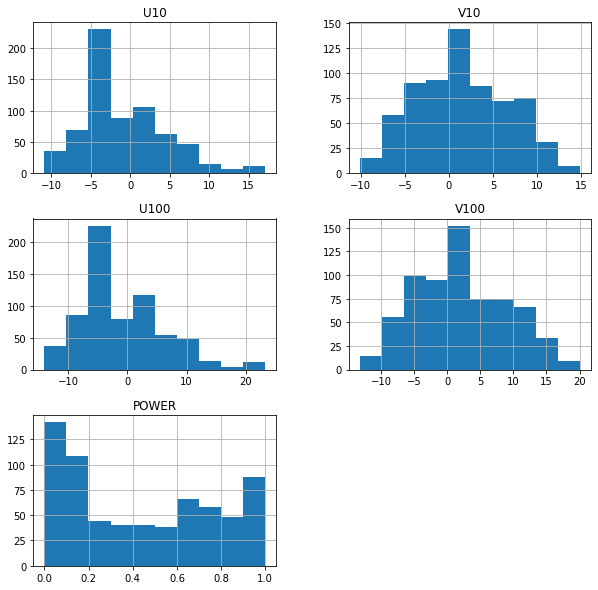

In [6]:
test_data.hist(figsize=(10,10))
plt.show()

### Preprocessing

In [7]:
train_data=train_data.dropna()
test_data=test_data.dropna()
train_data= train_data.reset_index(drop=True)

### Train Dev Split

In [8]:
label_column="POWER"
columns=list(train_data.columns)
columns.remove(label_column)

In [9]:
rs = ShuffleSplit(n_splits=1, test_size=.2, random_state=42)
train_index, test_index =next(rs.split(train_data))

In [10]:
subtrain_data, dev_data = train_data.iloc[train_index], train_data.iloc[test_index] 

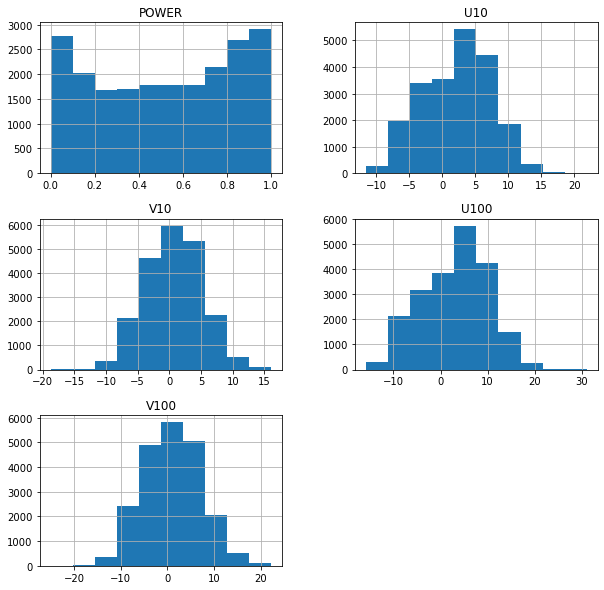

In [11]:
subtrain_data.hist(figsize=(10,10))
plt.show()


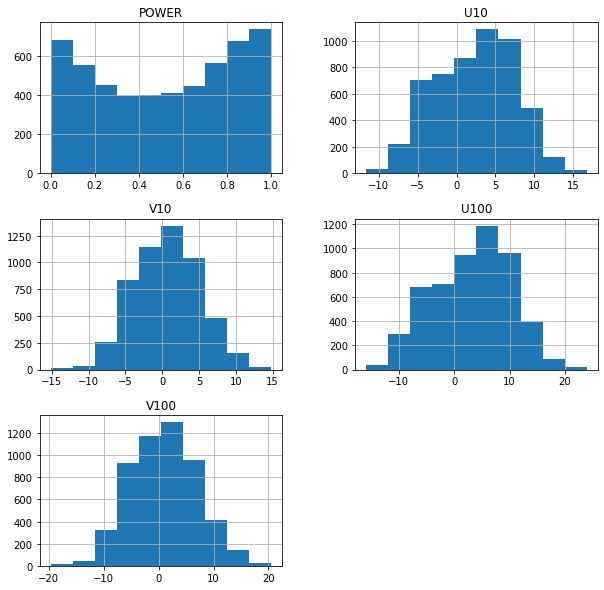

In [12]:
dev_data.hist(figsize=(10,10))
plt.show()

### Export data

In [13]:
train_data.to_csv("data/train_prep.csv",index=False)
subtrain_data.to_csv("data/subtrain_prep.csv",index=False)
dev_data.to_csv("data/dev_prep.csv",index=False)
test_data.to_csv("data/test_prep.csv",index=False)